In [37]:
import numpy as np
import pandas as pd
import os
from datetime import date
import seaborn as sns  
import matplotlib.pyplot as plt

# Settings: 
- seting up working directory 
- reading the data

In [12]:
cwd = os.getcwd()
print(f'Current working directory: {cwd}')
__root = "c:\\Kamil\\rekrutacje\\eon\\cases\\"
__programs= str(__root + "EON\\00_programs\\")
__input = str(__root + "EON\\01_input\\")
__output = str(__root + "EON\\02_output\\")
__temp = str(__root + "EON\\03_temp\\")


Current working directory: c:\Kamil\rekrutacje\eon\cases\EON\00_programs


In [16]:
df = pd.read_csv(str(__input + "Results_RAW.csv"), delimiter=";")

# Basic information about the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   QuestID             3546 non-null   int64 
 1   InterviewDate       3546 non-null   object
 2   InterviewLengthSec  3546 non-null   int64 
 3   InterviewStatus     3546 non-null   int64 
 4   AgeBands            3546 non-null   int64 
 5   Region              3546 non-null   int64 
 6   BA02R_271_PL        3546 non-null   int64 
 7   BA02R_272_PL        3546 non-null   int64 
 8   BA02R_273_PL        3546 non-null   int64 
 9   BA02R_274_PL        3546 non-null   int64 
 10  BA02R_279_PL        3546 non-null   int64 
 11  BA02R_280_PL        3546 non-null   int64 
 12  BA02R_282_PL        3546 non-null   int64 
 13  BA02R_283_PL        3546 non-null   int64 
 14  BA02R_284_PL        3546 non-null   int64 
 15  BA02R_285_PL        3546 non-null   int64 
 16  SU01R               3546

In [19]:
df.shape

(3546, 18)

In [68]:
df.isna().sum()

QuestID               0
InterviewDate         0
InterviewLengthSec    0
InterviewStatus       0
AgeBands              0
Region                0
BA02R_271_PL          0
BA02R_272_PL          0
BA02R_273_PL          0
BA02R_274_PL          0
BA02R_279_PL          0
BA02R_280_PL          0
BA02R_282_PL          0
BA02R_283_PL          0
BA02R_284_PL          0
BA02R_285_PL          0
SU01R                 0
NPS01R                0
dtype: int64

In [25]:
df.head()

,QuestID,InterviewDate,InterviewLengthSec,InterviewStatus,AgeBands,Region,BA02R_271_PL,BA02R_272_PL,BA02R_273_PL,BA02R_274_PL,BA02R_279_PL,BA02R_280_PL,BA02R_282_PL,BA02R_283_PL,BA02R_284_PL,BA02R_285_PL,SU01R,NPS01R
0,1,12.04.2020,107,1,3,911,0,1,1,1,0,1,1,1,0,0,552,0
1,2,07.04.2020,379,1,5,903,1,1,1,1,0,0,1,1,0,0,543,5
2,3,12.04.2020,384,1,3,901,0,1,0,0,0,0,0,0,0,0,542,2
3,4,03.04.2020,227,1,5,914,0,0,0,0,0,0,1,0,0,0,552,6
4,5,21.04.2020,176,1,2,907,1,1,1,1,0,1,1,1,0,0,541,0


- formatting dates

In [26]:
df['InterviewDate'] = pd.to_datetime(df['InterviewDate'], format = '%d.%m.%Y')

In [27]:
df['InterviewDate']

0      2020-04-12
1      2020-04-07
2      2020-04-12
3      2020-04-03
4      2020-04-21
          ...    
3541   2020-06-12
3542   2020-06-02
3543   2020-06-04
3544   2020-06-03
3545   2020-06-17
Name: InterviewDate, Length: 3546, dtype: datetime64[ns]

# Data Exploration
- visualization

In [29]:
df.groupby('AgeBands').mean()['NPS01R']

AgeBands
1    4.780645
2    4.554569
3    4.580556
4    4.570866
5    4.371311
Name: NPS01R, dtype: float64

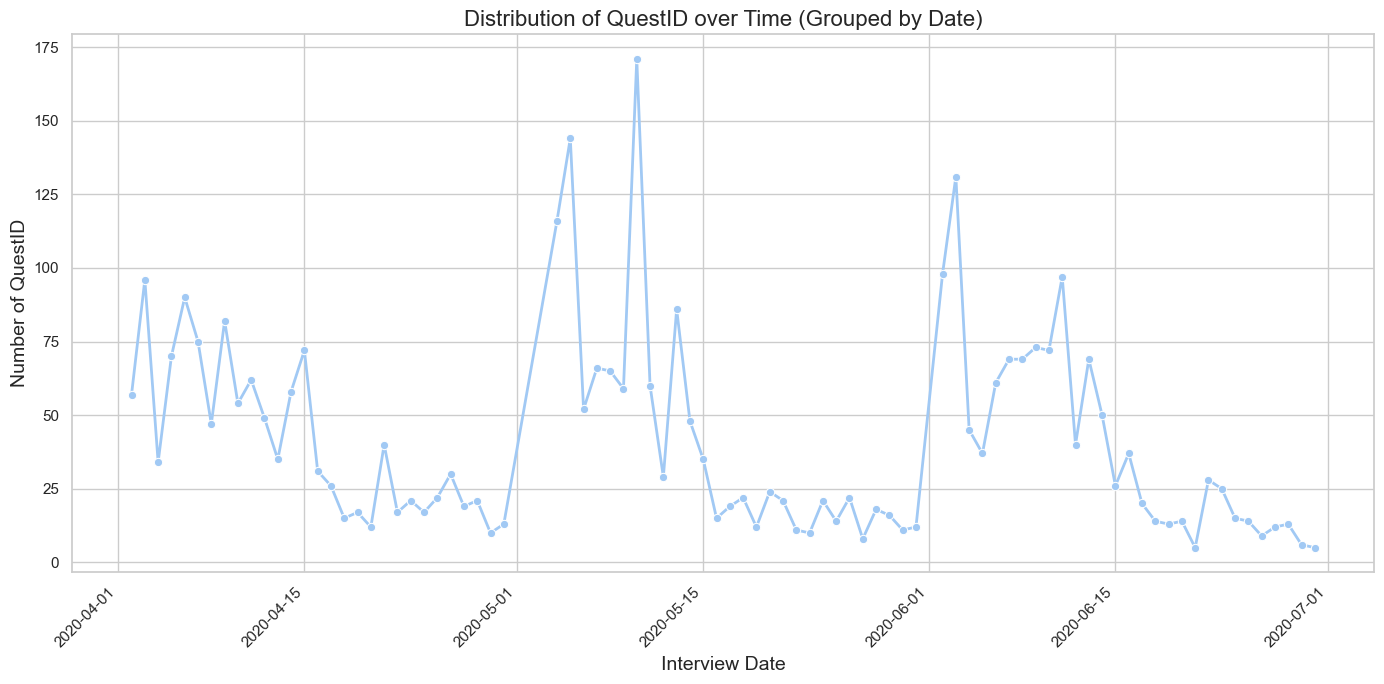

In [46]:

questid_counts = df.groupby('InterviewDate')['QuestID'].count()

# Plot the distribution over time

# Set seaborn style
sns.set(style="whitegrid", palette="pastel")

# Plot the distribution over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=questid_counts, color='b', marker='o', linestyle='-', linewidth=2)

# Beautify the plot
plt.title('Distribution of QuestID over Time (Grouped by Date)', fontsize=16)
plt.xlabel('Interview Date', fontsize=14)
plt.ylabel('Number of QuestID', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

c:\Users\barte\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\barte\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\barte\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

<Figure size 1200x600 with 0 Axes>

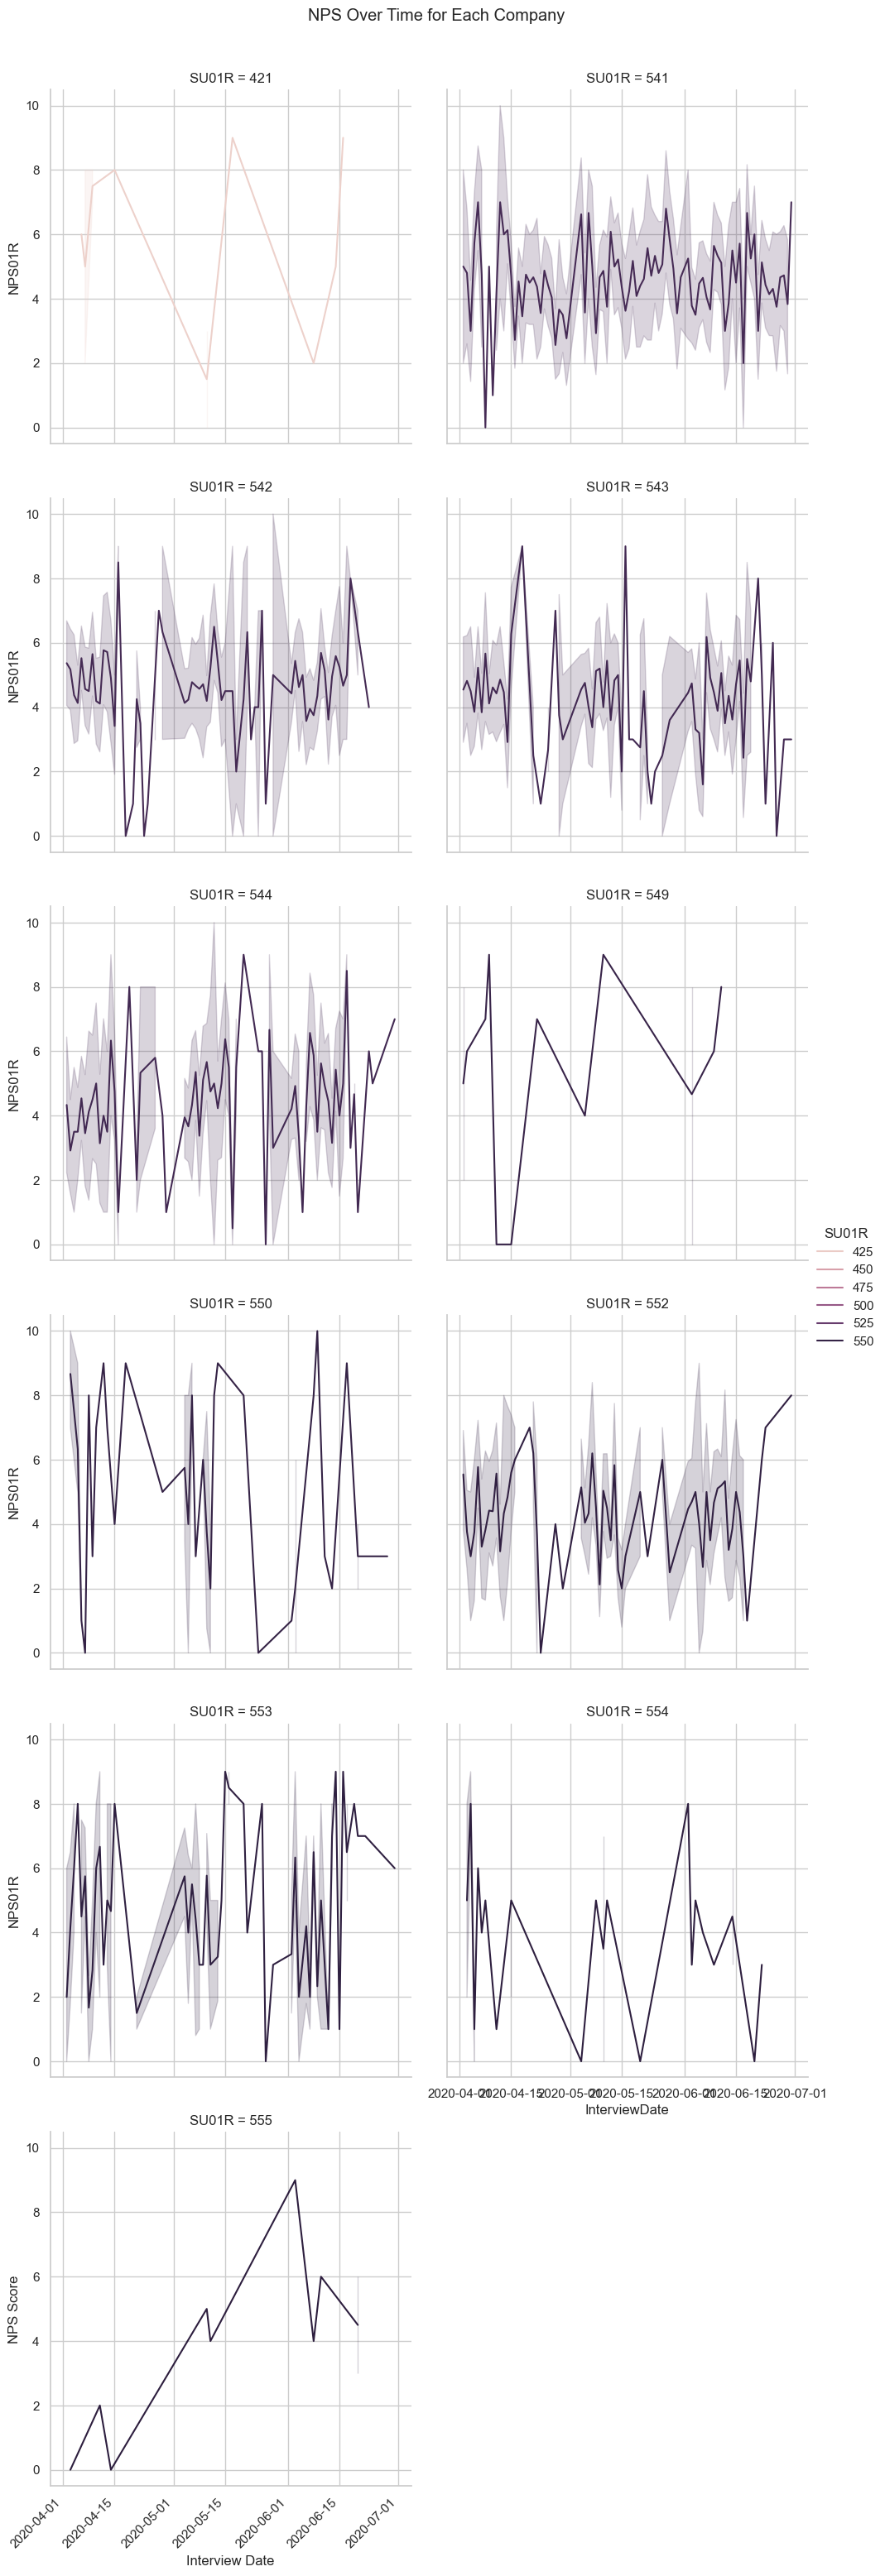

In [74]:
plt.figure(figsize=(12, 6))
sns.relplot(x='InterviewDate', y='NPS01R', hue='SU01R', kind='line', data=df, markers=True, col='SU01R', col_wrap=2)
plt.suptitle('NPS Over Time for Each Company', y=1.02)
plt.xlabel('Interview Date')
plt.ylabel('NPS Score')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [48]:
df.groupby('SU01R').mean()['NPS01R']

SU01R
421    5.384615
541    4.503575
542    4.671355
543    4.374242
544    4.461538
549    5.470588
550    5.060000
552    4.469957
553    4.553957
554    3.925926
555    3.900000
Name: NPS01R, dtype: float64

c:\Users\barte\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\barte\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\barte\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

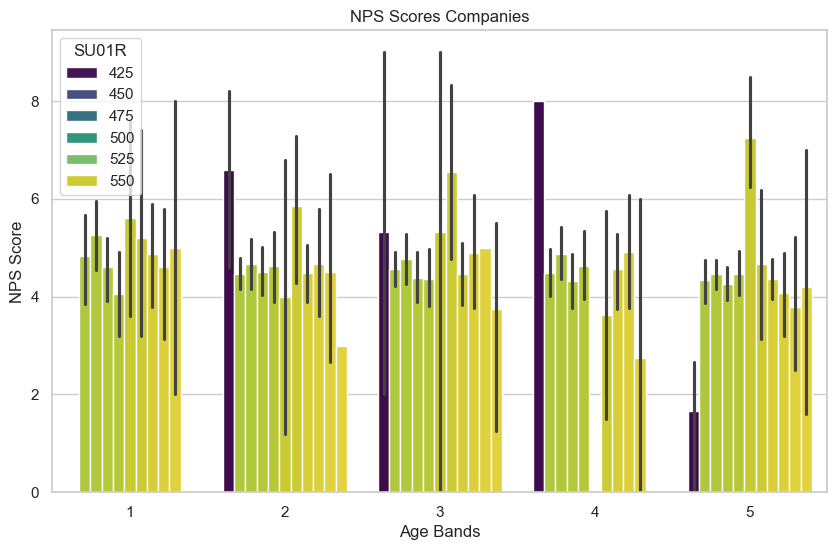

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot( y='NPS01R',x = 'AgeBands', hue='SU01R', data=df, palette='viridis')
plt.title('NPS Scores Companies')
plt.xlabel('Age Bands')
plt.ylabel('NPS Score')
plt.show()

In age bands 2, 3, and 4, Company 425 demonstrates superior NPS scores compared to its counterparts.  
However, in the 5th age band, it experiences the lowest NPS score, indicating that the company faces  
challenges or dissatisfaction specifically within this age group. This insight suggests a need for  
targeted strategies or improvements to enhance customer satisfaction and loyalty among individuals in the 5th age band.

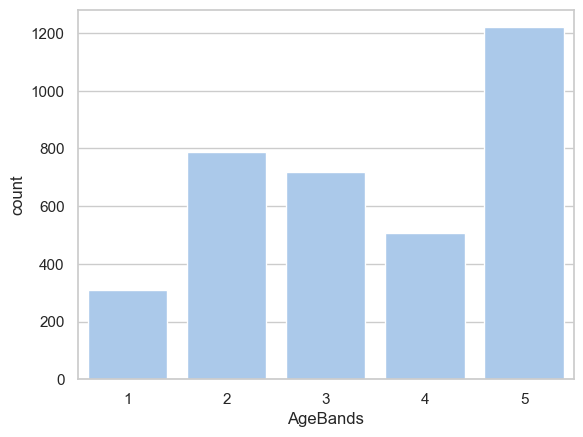

In [61]:
sns.countplot(x='AgeBands', data=df)
plt.show()

Given that the 5th age band represents the largest customer segment with over 1200 customers,  
while the combined customer count for bands 2, 3, and 4 is also significant, a proposed solution 
 could involve implementing targeted initiatives   
 to improve NPS scores within the 5th age band. Here are a few strategies to consider:
 1. Customer Segmentation Analysis:

- Conduct a deeper analysis within the 5th age band to identify specific preferences, concerns,  
or needs of customers in this segment. Understanding their expectations can help tailor strategies to address their unique requirements.

2. Tailored Marketing and Communication:

- Develop targeted marketing campaigns and communication strategies specifically 
 designed for customers in the 5th age band. Highlight features or benefits that resonate with this 
  age group and address any pain points identified in the analysis.

3. Enhanced Customer Support:

- Invest in customer support services that cater to the preferences of the 5th age band.  
This may include personalized assistance, clear communication channels,  
and additional support resources to improve overall customer satisfaction.
  